In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd

In [2]:
#reading data set
dataset=pd.read_csv('loan-prediction.csv')

In [3]:
#data cleaning
dataset['LoanAmount'].fillna(np.mean(dataset.LoanAmount),inplace=True)
dataset.fillna(method='ffill',inplace = True) #replace nan value by replaching exhisting prev value
#dataset.dropna(how='any',inplace=True)

In [4]:
#non numarical to numarical conversion
d=dataset
d.Property_Area.replace(['Urban','Semiurban','Rural'],[2,1,0],inplace=True)
d.Married.replace(['Yes','No'],[1,0],inplace=True)
d.Gender.replace(['Male','Female'],[1,0],inplace=True)
d.Education.replace(['Graduate','Not Graduate'],[1,0],inplace=True)
d.Self_Employed.replace(['Yes','No'],[1,0],inplace=True)
d.Dependents.replace(['0','1','2','3+'],[0,1,2,3],inplace=True)
d.Loan_Status.replace(['Y','N'],[1,0],inplace=True)

In [5]:
dataset=d
dataset.to_csv('loan-prediction1.csv',index=False)

In [56]:
from sklearn.model_selection import train_test_split
X = dataset.iloc[:,1:-1]
y = dataset.iloc[:,-1]
#split the data set for training and testing
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=2017) #random state=same seed

In [57]:
from sklearn.preprocessing import StandardScaler
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_std=sc.transform(X)

C:\Users\Pritam\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Pritam\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """
C:\Users\Pritam\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
C:\Users\Pritam\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [58]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(491, 11) (491,) (123, 11) (123,)


In [68]:
#some tensor parameters
learning_rate=0.3
training_epochs=1000
cost_history=np.empty(shape=[1],dtype=float)
n_dim=X.shape[1]
n_class=2
model_path="C:\\Users\\Pritam\\Anaconda3\\tensor1"

In [69]:
#num of hidden layers and neurones per layer
n_hidden_1=100
n_hidden_2=100
n_hidden_3=100
n_hidden_4=100

In [70]:
#tensors
x=tf.placeholder(tf.float32,[None,n_dim])
W=tf.Variable(tf.zeros([n_dim,n_class]))
b=tf.Variable(tf.zeros([n_class]))
y_=tf.placeholder(tf.float32,[None,n_class])

In [75]:
def multilayer_perceptron(x,weights,biases):
    layer_1=tf.add(tf.matmul(x,weights['h1']),biases['b1'])
    layer_1=tf.nn.sigmoid(layer_1)
    
    layer_2=tf.add(tf.matmul(layer_1,weights['h2']),biases['b2'])
    layer_2=tf.nn.sigmoid(layer_2)
    
    layer_3=tf.add(tf.matmul(layer_2,weights['h3']),biases['b3'])
    layer_3=tf.nn.sigmoid(layer_3)
    
    layer_4=tf.add(tf.matmul(layer_3,weights['h4']),biases['b4'])
    layer_4=tf.nn.sigmoid(layer_4)
    
    out_layer=tf.matmul(layer_4,weights['out']+biases['out'])
    return out_layer

In [41]:
weights={
    'h1':tf.Variable(tf.truncated_normal([n_dim,n_hidden_1])),
    'h2':tf.Variable(tf.truncated_normal([n_hidden_1,n_hidden_2])),
    'h3':tf.Variable(tf.truncated_normal([n_hidden_2,n_hidden_3])),
    'h4':tf.Variable(tf.truncated_normal([n_hidden_3,n_hidden_4])),
    'out':tf.Variable(tf.truncated_normal([n_hidden_4,n_class]))
}
biases={
    'b1':tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2':tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3':tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4':tf.Variable(tf.truncated_normal([n_hidden_4])),
    'out':tf.Variable(tf.truncated_normal([n_class])),
}

In [42]:
init=tf.global_variables_initializer()
saver=tf.train.Saver()

In [43]:
#calling the model
y=multilayer_perceptron(x,weights,biases)

In [44]:
cost_function=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y,labels=y_))
training_step=tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

In [45]:
sess=tf.Session()
sess.run(init)

In [46]:
mse_history=[]
accuracy_history=[]

In [47]:
for epoch in range(training_epochs):
    sess.run(training_step,feed_dict={x:X_train,y_:y_train})
    cost=sess.run(cost_function,feed_dict={x:X_train,y_:y_train})
    cost_history=np.append(cost_history,cost)
    correct_prediction=tf.equal(tf.arg_max(y,1),tf.arg_max(y_,1))
    accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
    pred_y=sess.run(y,feed_dict={x:X_test})
    mse=tf.reduce_mean(tf.square(pred_y - y_test))
    mse_=sess.run(mse)
    mse_history.append(mse_)
    accuracy=(sess.run(accuracy,feed_dict={x:X_train,y_:y_train}))
    accuracy_history.append(accuracy)
    print('epoch : ',epoch,' - ','cost : ',cost,' - MSE : ',mse_,' - Train Accuracy : ',accuracy)

ValueError: Cannot feed value of shape (429,) for Tensor 'Placeholder_6:0', which has shape '(?, 2)'

In [48]:
save_path=saver.save(sess,model_path)

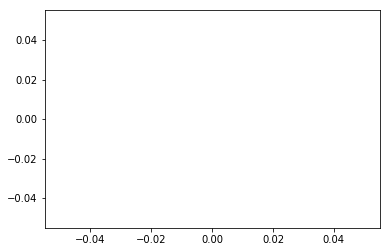

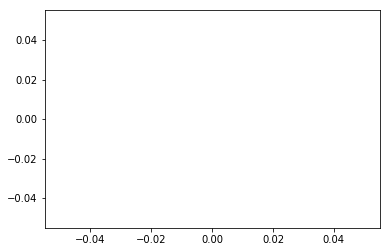

In [50]:
plt.plot(mse_history,'r')
plt.show()
plt.plot(accuracy_history)
plt.show()

In [52]:
correct_prediction=tf.equal(tf.arg_max(y,1),tf.arg_max(y_,1))
accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
print("Test_accuracy",(sess.run(accuracy,feed_dict={x:X_test,y_:y_test})))

ValueError: Cannot feed value of shape (185,) for Tensor 'Placeholder_6:0', which has shape '(?, 2)'

In [53]:
pred_y=sess.run(y,feed_dict={x:X_test})
mse=tf.reduce_mean(tf.square(pred_y-y_test))
print("MSE : %.4f"%sess.run(mse))

ValueError: operands could not be broadcast together with shapes (185,2) (185,) 